**Click on File and save a copy in Drive.**

*Here is our final task. We have to predict Indian GDP using past data.*

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 1Nzu1PZHlcq95GOeA7wODWkDXsvMIyZixi

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1Nzu1PZHlcq95GOeA7wODWkDXsvMIyZixi 



In [ ]:
#read csv from runtime using pd.read_csv
data = pd.read_csv("https://drive.google.com/uc?id=1Nzu1PZHlcq95GOeA7wODWkDXsvMIyZix")

In [ ]:
data.head()


,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,5,2016,2294.80,138640,8.26
1,6,2015,2103.59,128480,8.00
2,7,2014,2039.13,125920,7.41
3,8,2013,1856.72,116000,6.39
4,9,2012,1827.64,115520,5.46


In [ ]:
#delete unnamed: 0 column if you incounter
data.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
data.head()

,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,2016,2294.80,138640,8.26
1,2015,2103.59,128480,8.00
2,2014,2039.13,125920,7.41
3,2013,1856.72,116000,6.39
4,2012,1827.64,115520,5.46


In [ ]:
#make column 'India GDP - Historical Data.1' as Y
data.rename(columns={'India GDP - Historical Data.1': 'Y'}, inplace=True)

In [ ]:
X = np.asarray(data['India GDP - Historical Data'].values.tolist())

In [ ]:
X = X.reshape(-1,1)

In [ ]:
Y = data['Y']

Text(0, 0.5, 'GDP')

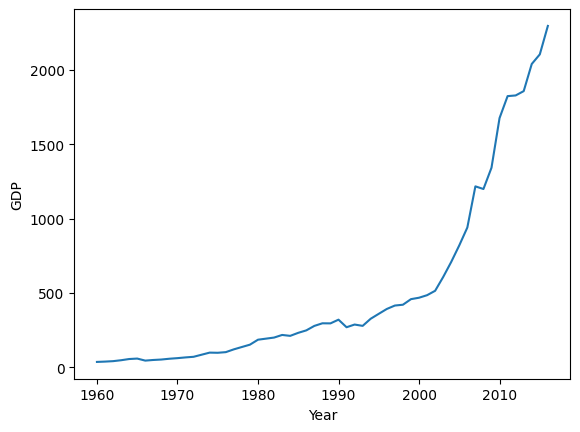

In [ ]:
#make plot of GDP vs Year


# Your code here
plt.plot(X,Y)

plt.xlabel("Year")
plt.ylabel("GDP")


*To ensure that we don't exceed the limit while computing, we are subtracting 1959 from each year.*


In [ ]:
for i in range(np.shape(X)[0]):
  X[i][0]=X[i][0]-1959

Text(0, 0.5, 'GDP')

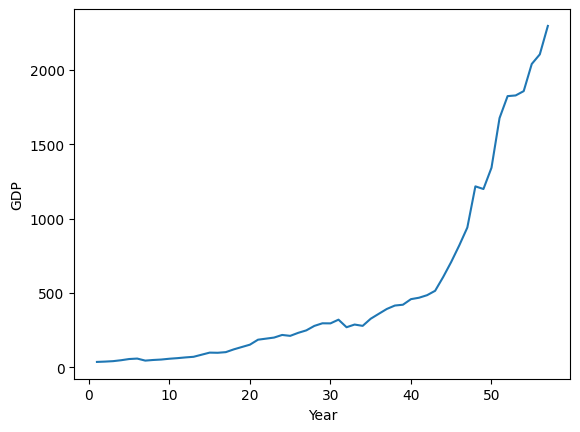

In [ ]:
plt.plot(X,Y)

plt.xlabel("Year")
plt.ylabel("GDP")

Make sure your Shape X=(57, 1) Y=(57,).

In [ ]:
#print and check the shape
print(X.shape)
print(Y.shape)

Y_shape = np.shape(Y)[0]
rows= np.shape(X)[0]
print(rows)
print(Y_shape)

(57, 1)
(57,)
57
57


In [ ]:
X[0][0]


57

To finish our final task, we will use Polynominal Regression.

**HINT:**

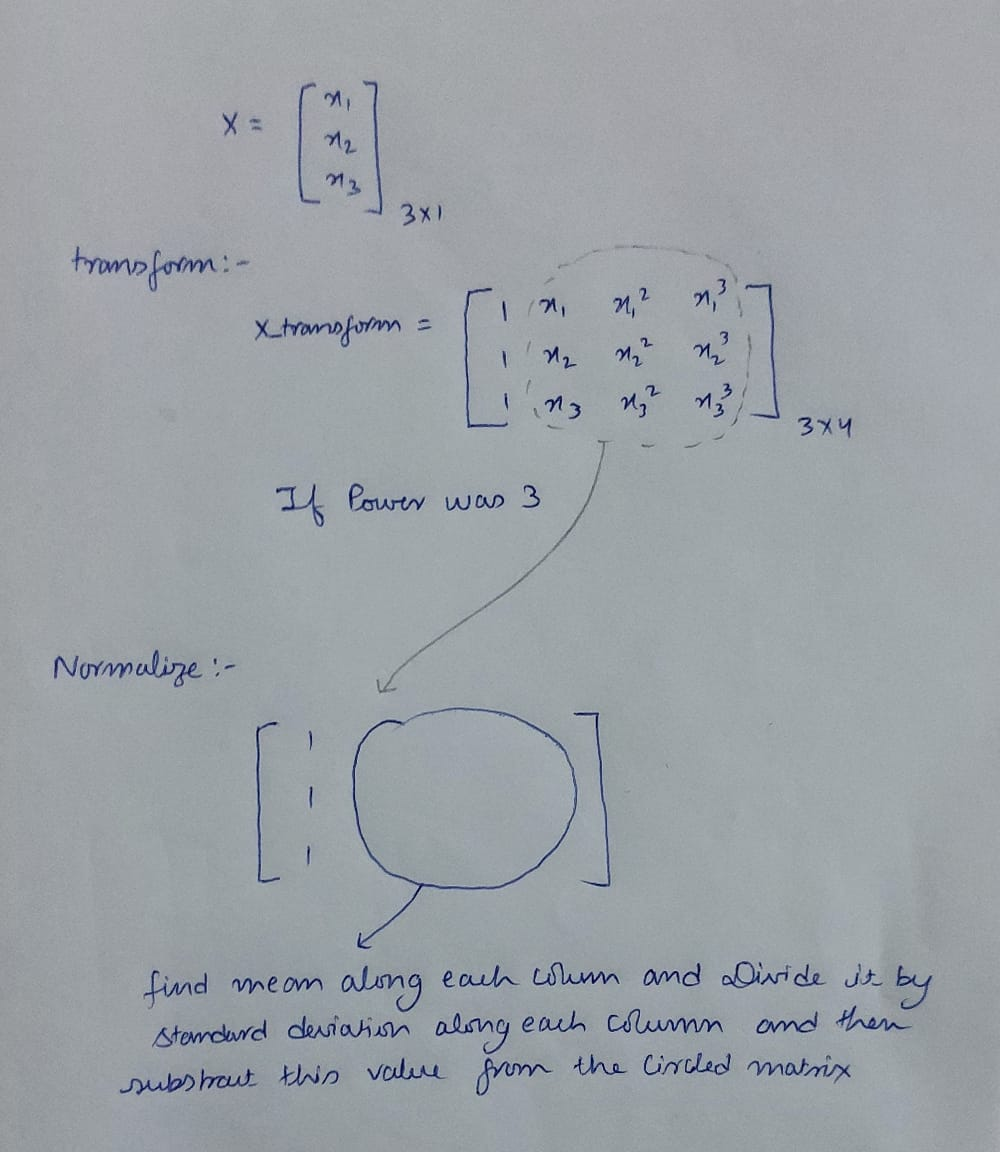

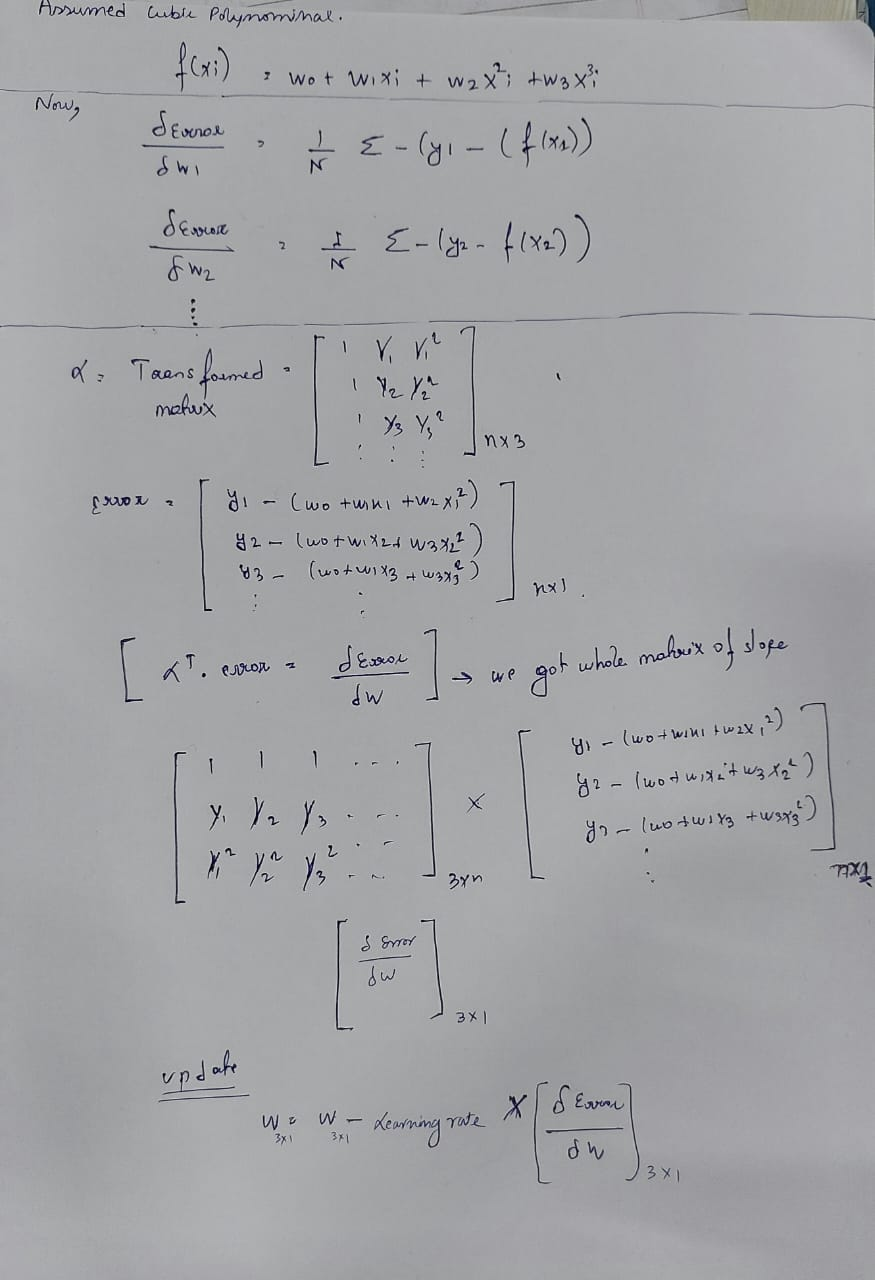

In [ ]:
cols = 6
rows = 57
X_transform = np.zeros((rows, cols))


for i in range (rows):
  for j in range (cols):
    X_transform[i][j] = ((X[i][0])**j)
# print(X_transform)

sum = np.mean(X_transform, axis = 0)
#print(sum)
sd = np.std(X_transform, axis =0)
#print(sd)
net=[0]*cols

for i in range (1,cols):
  net[i] = sum[i]/sd[i]
for i in range (rows):
  for j in range (1,cols):
    X_transform[i][j] -= net[j-1]


print(sum)
print(X_transform.shape)
# for i in range(X_transform.shape[0]):
#   X_transform[i] -= net

[1.00000000e+00 2.90000000e+01 1.11166667e+03 4.79370000e+04
 2.20487967e+06 1.05637169e+08]
(57, 6)


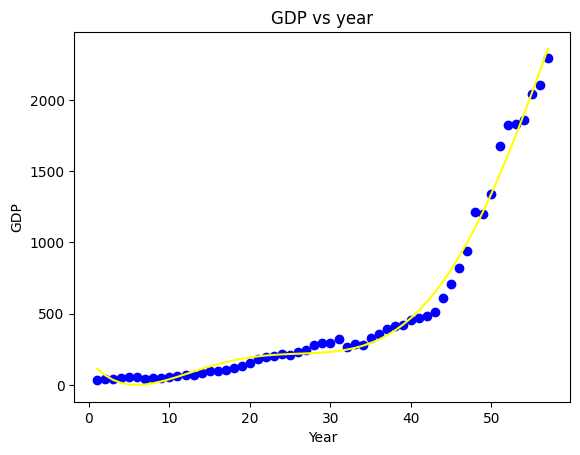

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, Y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)
plt.scatter(X, Y, color = 'blue')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'yellow')
plt.title('GDP vs year')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()


In [ ]:
#Polynomial Regression

class PolynomialRegression :
    def __init__( self, degree=5, learning_rate=0.1, iterations=500 ) :
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations

    # function to transform X

    def transform( self, X ) :
          cols = self.degree + 1
          rows = np.shape(self.X)[0]
          # cols= 6
          # rows= 57
          X_transform = np.zeros((rows, cols))

          # if X.ndim == 1:
          #   cols = 1
          for i in range (rows):
            for j in range (cols):
              # print((X[i])**j)
              X_transform[i][j] = ((X[i])**j)
                # print("",X_transform)
          # print(X_transform)
          # print(X_transform.shape)
          return X_transform


    # function to normalize X_transform

    def normalize( self, X_transformed ) :
          # sum = np.mean(X_transformed, axis = 0)
          # sd = np.std(X_transformed, axis =0)


          # for j in range (1,cols):
          #   for i in range (rows):
          #     X_transformed[i][j] -= sum[j]
          #     X_transformed[i][j] /= sd[j]

          # # print(X_transformed)
          # # print(X_transformed.shape)
          # return X_transformed

          X_transformed[:, 1:] = ( X_transformed[:, 1:] - np.mean( X_transformed[:, 1:], axis = 0 ) ) / np.std( X_transformed[:, 1:], axis = 0 )

          return X_transformed

    # model training

    def fit( self, X, Y ) :
        self.X = X
        self.Y = Y
        # self.m, self.n = None
        self.m = None
        self.n = None
        # weight initialization
        self.W = np.zeros(6)

        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n using self.transform
        X_transform = self.transform(X)
        # print(X_transform)
        # normalize X_transform using self.normalize
        X_normalize = self.normalize(X_transform)


        Y_transform = self.transform(Y)
        # print(Y_transform)
        # gradient descent learning
        for i in range( self.iterations ) :
          # cols = self.degree + 1
          # rows = np.shape(self.X)[0]
          error = [0]*cols
          y_pred = np.zeros((rows, cols))
          # for i in range (rows):
          #   for j in range (cols):

          y_pred = np.dot(X_transform,self.W)
          # for i in range(X.shape[0]):
          #   # y_pred = np.dot()
          #   error[i]= Y[i]-y_pred[i]

          error= y_pred - Y
          # print(error)
          # error.reshape(57,1)
          # update weights (To Update Weights take a dot product of normalized X and errorp)
          dE = np.dot(X_normalize.T, error) / self.X.shape[0]

          # dE = np.dot(X_transform.T, error)
          # print(dE.shape)
          # print(self.learning_rate*dE)
          self.W = self.W - self.learning_rate * dE
        # print(self.W)
        return self.W
        # print(W)

    # predict

    def predict( self, X, W ) :
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform( X )
        X_normalize = self.normalize( X_transform )
        return np.dot( X_transform, self.W )

In [ ]:
# Driver code
model = PolynomialRegression(degree=5,learning_rate=0.3, iterations=500)

In [ ]:
# Train model using model.fit and save weights
W = model.fit(X,Y)
W

array([ 514.26701754,  124.35462882, -157.28999623,  -47.40538322,
        213.11036473,  486.17709747])

In [ ]:
# Prediction on training set
Y_pred = model.predict( X,W )
Y_pred

array([2398.10675875, 2207.71661154, 2030.25617505, 1865.06539181,
       1711.50624197, 1568.96237443, 1436.83873808, 1314.56121288,
       1201.57624112, 1097.35045858, 1001.37032566,  913.14175862,
        832.18976068,  758.0580533 ,  690.30870723,  628.5217738 ,
        572.29491603,  521.24303981,  474.99792511,  433.20785713,
        395.53725746,  361.6663153 ,  331.29061861,  304.12078527,
        279.88209428,  258.31411694,  239.17034802,  222.21783689,
        207.2368188 ,  194.02034593,  182.37391867,  172.11511674,
        163.07323038,  155.08889153,  148.01370499,  141.70987962,
        136.04985951,  130.91595512,  126.19997451,  121.80285449,
        117.63429178,  113.61237423,  109.66321193,  105.72056846,
        101.725492  ,   97.62594657,   93.37644314,   88.93767085,
         84.27612818,   79.3637541 ,   74.17755928,   68.69925725,
         62.91489557,   56.81448702,   50.39164076,   43.64319352,
         36.56884076])

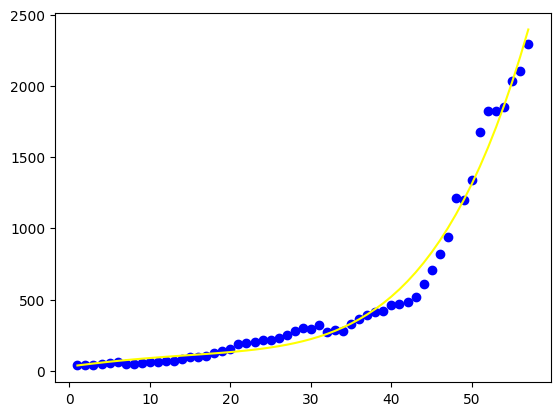

In [ ]:

# Visualization
#Scatter plot X,Y in blue colour
#line plot of X,Y_pred in yellow colour

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='yellow')
plt.show()

In [ ]:
# weights
print("Weights:", model.W)

Weights: [ 514.26701754  124.35462882 -157.28999623  -47.40538322  213.11036473
  486.17709747]


In [ ]:
!gdown --id 1KEB87LRwss41W8_5B1jYRxhUOI7_e_1D
#https://drive.google.com/file/d/1KEB87LRwss41W8_5B1jYRxhUOI7_e_1D/view?usp=sharing

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KEB87LRwss41W8_5B1jYRxhUOI7_e_1D
To: /content/fi_test.csv
100% 978/978 [00:00<00:00, 1.16MB/s]


In [ ]:
#read fi_test from runtime using pd.read_csv
fi_test = pd.read_csv("https://drive.google.com/uc?id=1KEB87LRwss41W8_5B1jYRxhUOI7_e_1D")

In [ ]:
fi_test.head()

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,0,2021,3173.40,182160,8.95
1,1,2020,2667.69,154640,-6.60
2,2,2019,2831.55,165760,3.74
3,3,2018,2702.93,159840,6.45
4,4,2017,2651.47,158480,6.80


In [ ]:
X_test=fi_test['India GDP - Historical Data']
X_test=np.array(X_test)
X_test = X_test.reshape(-1,1)
Y_test=fi_test['India GDP - Historical Data.1']
Y_test=np.array(Y_test)
for i in range (np.shape(X_test)[0]):

  if Y_test[i] == 0:
    print("L")
    Y_test=Y_test[0:i]
    X_test=X_test[0:i]
    break
#print and check the shape


print(X_test)
print(X_test.shape)
print(Y_test)

L
[[2021]
 [2020]
 [2019]
 [2018]
 [2017]]
(5, 1)
[3173.4  2667.69 2831.55 2702.93 2651.47]


In [ ]:
for i in range(np.shape(X_test)[0]):
  X_test[i][0]=X_test[i][0]-1959

In [ ]:
#Predict GDP with X_test
# Driver code
model = PolynomialRegression(degree=5,learning_rate=0.3, iterations=500)
W_new = model.fit(X_test,Y_test)
gdp = model.predict( X,W_new )

[2021]
Actual: 3173.4
Predicted: 3025.392611574283


[2020]
Actual: 2667.69
Predicted: 2898.5528008859906


[2019]
Actual: 2831.55
Predicted: 2788.9797920145224


[2018]
Actual: 2702.93
Predicted: 2695.8296934671225


[2017]
Actual: 2651.47
Predicted: 2618.2851020580806




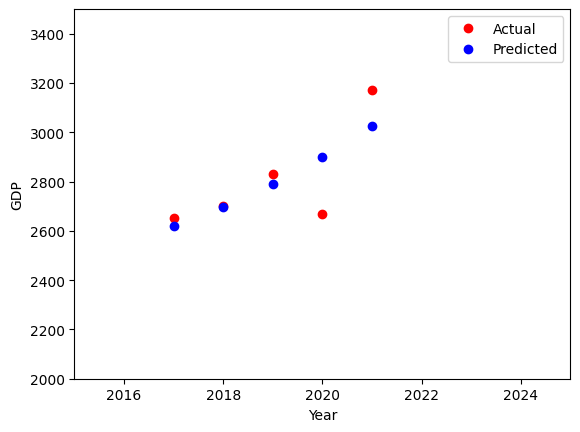

In [ ]:
# ! pip install scikit-learn
# from sklearn.metrics import r2_score

# def r2score(y_true, y_pred):
#   return r2_score(y_true,y_pred)

for i in range(5):
  plt.plot(X_test[i]+1959, Y_test[i],'ro')
  plt.plot(X_test[i]+1959, gdp[i],'bo')
  print(X_test[i]+1959)

  print( "Actual:", Y_test[i] )
  print("Predicted:", gdp[i])

  # print("Accuracy:", r2score(Y_test, gdp))


  print("\n")
# xpoints = np.array(Y_test)
# xpoints = np.array(gdp)
# ypoints = np.array(X_test)

# plt.plot(xpoints, ypoints, 'o')
# plt.show()
# y1 = [0,1,2,3,4,5]
# y2 = [6,7,8,9,10,11,12,13,14,15]

# x1 = range(len(y1))
# x2 = range(len(y2))


# plt.plot()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(['Actual','Predicted'])

plt.xlim(2015, 2025)
plt.ylim(2000, 3500)
plt.show()

[Please click on this link to access subjective questions](https://docs.google.com/document/d/1kagZcm2hhipJEHFh3cIgXGg9hhG6Hol6Fs6wAIHSMsk/edit?usp=sharing)